# Capítulo 5. Máquinas de Soporte de Vectores


## Máquinas de Soporte de Vectores (SVM) — Qué son y para qué sirven

---

## 1. Clasificación Lineal con SVM
**Qué es:**  
Un modelo de clasificación que busca el hiperplano que mejor separa dos clases, maximizando el margen entre ellas.

**Para qué sirve:**  
- Clasificación binaria cuando los datos son aproximadamente linealmente separables.  
- Modelos robustos frente al sobreajuste, especialmente cuando el número de características es grande.

---

## 2. Clasificador No Lineal con SVM
**Qué es:**  
Una extensión del SVM lineal que permite clasificar datos no linealmente separables mediante el uso de funciones kernel.

**Para qué sirve:**  
- Abordar problemas donde las fronteras de decisión son curvas o complejas.  
- Transformar el espacio original para permitir separar clases que antes no lo eran.

---

### 2.1 Kernel Polinomial
**Qué es:**  
Un kernel que genera combinaciones polinomiales de las características originales para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar fronteras de decisión curvas con control sobre el grado de flexibilidad.  
- Adecuado cuando se sospechan interacciones polinomiales entre variables.

---

### 2.2 Kernel RBF (Gaussiano)
**Qué es:**  
Un kernel que mide la similitud mediante una función exponencial basada en la distancia entre ejemplos.

**Para qué sirve:**  
- Capturar relaciones no lineales altamente complejas.  
- Crear fronteras suaves y flexibles que se adaptan muy bien a la forma de los datos.  
- Es el kernel más utilizado en la práctica.

---

## 3. Regresión con SVM (SVR)
**Qué es:**  
La versión de SVM para problemas de regresión, buscando ajustar una función que mantenga la mayoría de los puntos dentro de un margen de tolerancia.

**Para qué sirve:**  
- Predecir valores numéricos con modelos robustos a outliers.  
- Ajustar regresiones tanto lineales como no lineales mediante kernels.

---

### 3.1 Regresión Lineal con SVM
**Qué es:**  
Una regresión basada en un SVM lineal, que busca un margen dentro del cual los errores no son penalizados.

**Para qué sirve:**  
- Problemas de regresión lineal donde se desea robustez frente a valores atípicos.  
- Alternativa más resistente que la regresión lineal tradicional.

---

### 3.2 Regresión Polinomial con SVM
**Qué es:**  
Una SVR que utiliza un kernel polinomial para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar relaciones polinomiales complejas.  
- Ajustar curvas sin necesidad de generar manualmente características polinomiales.



## <span style="color:green">1. Clasificación Lineal con SVM</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Las máquinas de vectores de soporte depende de que los datos esten bien escalados 

In [2]:
# Importar los datos
candidates = {
    'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
    'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
    'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
    'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
}

# Crear DataFrame
df = pd.DataFrame(candidates)

# Visualizar
df.head()


,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [3]:
# Variables predictoras
X = df[['gmat', 'gpa', 'work_experience']]

# Variable objetivo
y = df['admitted']


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Pipeline: escalado + SVM lineal
svm_lineal = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])


In [5]:
# Entrenar el modelo
svm_lineal.fit(X, y)

# Predicciones
y_pred = svm_lineal.predict(X)

# Visualizar predicciones
y_pred


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [6]:
# Sujeto aleatorio (gmat, gpa, experiencia)
nuevo_candidato = [[700, 3.5, 4]]

# Predicción
prediccion = svm_lineal.predict(nuevo_candidato)

prediccion


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
cm


array([[18,  3],
       [ 1, 18]], dtype=int64)

In [8]:
from sklearn.metrics import f1_score

# F1 Score
f1 = f1_score(y, y_pred)
f1


0.9

***

## <span style="color:green">2. Clasificador No Lineal con SVM</span>

#### <span style="color:blue"> 2.1 Kernel Polinomial</span>

In [ ]:
from sklearn.datasets import make_moons

# Crear dataset artificial con algo de ruido
X, y = make_moons(n_samples=300, noise=0.2)


In [11]:
#Visualizar x, y 
y

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], d

Aquí, todos tendremos datos diferentes. No se alteren si no les da lo mismo que a mi. 

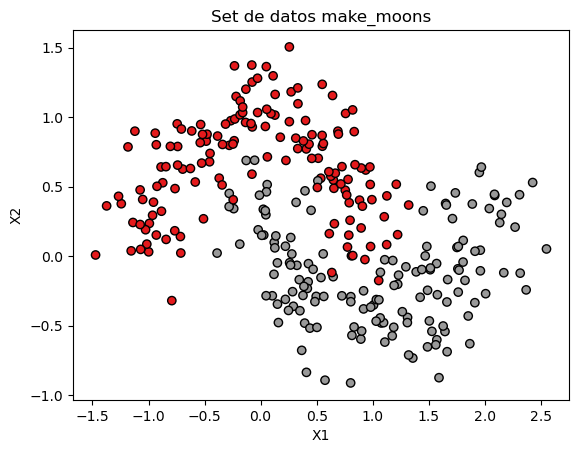

In [12]:
# Graficar el set de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Set de datos make_moons")
plt.show()


In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline: escalado + SVM con kernel polinomial
svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="poly", degree=3))  # degree=3 por defecto, se puede variar
])


Como es un kernel polinomial, tienes que especificar el grado del mismo. 

In [ ]:
# Entrenar el modelo
svm_poly.fit(X, y)

# Predicciones
y_pred = svm_poly.predict(X)


In [16]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
cm


array([[139,  11],
       [ 25, 125]], dtype=int64)

In [17]:
from sklearn.metrics import f1_score

# Calcular F1 Score
f1 = f1_score(y, y_pred)
f1


0.8741258741258742

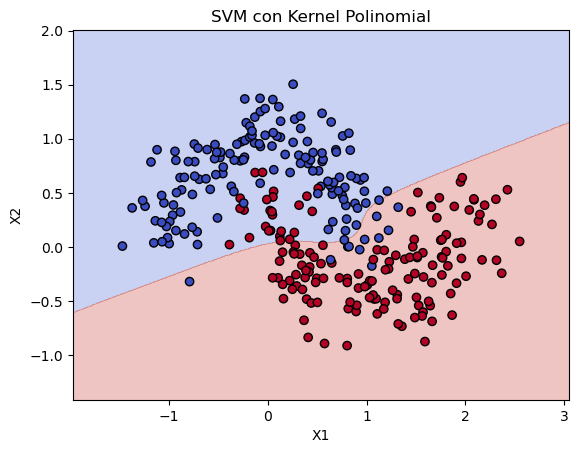

In [18]:
# Crear una malla de puntos para graficar la frontera
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

# Predecir sobre cada punto de la malla
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera y los datos
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM con Kernel Polinomial")
plt.show()


**Ejercicio Extra**: Varía el grado en el polinomio para evaluar la gráfica que despliega acorde al clasificador. 
Por ejemplo, grado 3.

***

#### <span style="color:blue"> 2.2 Kernel RBF Gaussiano</span>

In [20]:
from sklearn.preprocessing import StandardScaler

# Pipeline: escalado + SVM con kernel RBF
svm_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", gamma='scale'))  # gamma='scale' es el valor recomendado por defecto
])


gamma es un parámetro de regularización. **Sobreajuste**= Reducir gamma. **Subajuste**=Aumentar gamma

In [22]:
# Entrenar el modelo
svm_rbf.fit(X, y)

# Predicciones
y_pred = svm_rbf.predict(X)

In [23]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
cm


array([[140,  10],
       [  8, 142]], dtype=int64)

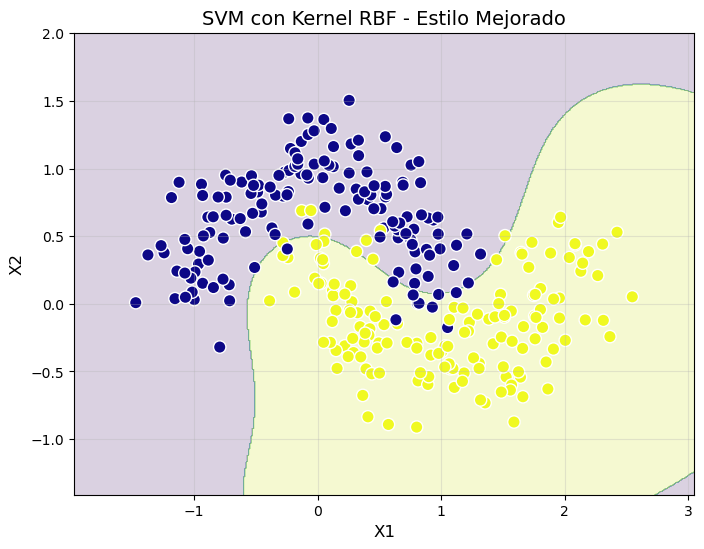

In [24]:
# Crear malla de puntos para la frontera
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

# Predecir sobre cada punto de la malla
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Estilo de la gráfica
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.viridis)  # fondo con transparencia y colores agradables
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.plasma, edgecolors='white', s=80)  # puntos más grandes con borde blanco
plt.xlabel("X1", fontsize=12)
plt.ylabel("X2", fontsize=12)
plt.title("SVM con Kernel RBF - Estilo Mejorado", fontsize=14)
plt.grid(alpha=0.3)  # ligera cuadrícula
plt.show()


Ejercicio: varía los hiperparametros, es decir **gamma y C**. 
Observa los resultados y analiza.

***

### <span style="color:green"> 3. Regresión con SVM</span>

#### <span style="color:blue"> 3.1 Regresión Lineal </span>

In [ ]:
from sklearn.svm import LinearSVR

# Pipeline: escalado + regresión lineal con SVM
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", LinearSVR(epsilon=1.5))
])


#### <span style="color:blue"> 3.2 Regresión Polinomial </span>

In [26]:
from sklearn.svm import SVR

# Pipeline: escalado + SVR polinomial
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", SVR(kernel="poly", degree=3, epsilon=1.5))
])
